In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [43]:
housing = pd.read_csv(r"D:\CDAC\PML\Datasets\Housing.csv")
housing.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

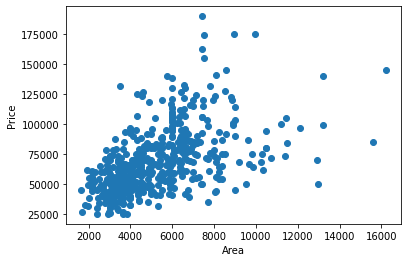

In [44]:
plt.scatter(housing['lotsize'], housing['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [45]:
housing['lotsize'].corr(housing['price'])

0.5357956724321843

In [46]:
X = housing[['lotsize']]
y = housing['price']
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

34136.19156491505 [6.59876759]


In [47]:
ycap = 34136.19156491505 + housing['lotsize']*6.59876759

In [48]:
np.sum((y - ycap)**2)

277043862881.15326

In [49]:
X = housing[['lotsize','bedrooms','bathrms']]
y = housing['price']
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

-2418.292616740757 [5.41120044e+00 5.82680241e+03 1.97502101e+04]


In [50]:
ycap = -2418.292616740757 + housing['lotsize']*5.41120044 + housing['bedrooms']*5.82680241e+03 + 1.97502101e+04*housing['bathrms']

In [51]:
np.sum((y - ycap)**2)

199628303501.08502

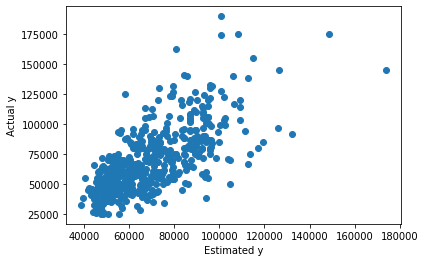

In [52]:
plt.scatter(ycap, y)
plt.xlabel("Estimated y")
plt.ylabel("Actual y")
plt.show()

In [53]:
housing

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [54]:
housing['driveway'] = np.where(housing['driveway'] == "yes", 1, 0)
housing

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,1,no,no,no,no,0,no
2,49500.0,3060,3,1,1,1,no,no,no,no,0,no
3,60500.0,6650,3,1,2,1,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,1,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,1,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,1,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,1,yes,no,no,yes,1,no


In [55]:
X = housing[['lotsize','bedrooms','bathrms','driveway']]
y = housing['price']
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

-11501.4140511874 [4.78495477e+00 6.19654687e+03 1.96887926e+04 1.31448062e+04]


In [56]:
ycap = -11501.414051187356 + housing['lotsize']*4.78495477 + housing['bedrooms']*6.19654687e+03 + 1.96887926e+04*housing['bathrms'] + 1.31448062e+04*housing['driveway']

OR

In [57]:
ycap = lr.predict(X)

In [58]:
np.sum((y - ycap)**2)

189190016788.4398

Reloading the same data

In [59]:
housing = pd.read_csv(r"D:\CDAC\PML\Datasets\Housing.csv")
housing.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

### One Hot Encoding / Dummying

In [60]:
dum_hous = pd.get_dummies(housing, drop_first=True)
X = dum_hous.drop('price', axis=1)
y = dum_hous['price']

In [61]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

-4038.3504250983824 [3.54630297e+00 1.83200347e+03 1.43355585e+04 6.55694571e+03
 4.24482900e+03 6.68777889e+03 4.51128383e+03 5.45238554e+03
 1.28314063e+04 1.26328904e+04 9.36951324e+03]


In [62]:
ycap = lr.predict(X)
np.sum((y - ycap)**2)

127025071644.46799

## Salaries Dataset

In [63]:
sals = pd.read_csv("D:/CDAC/PML/Datasets/Salaries.csv")

In [64]:
dum_sals = pd.get_dummies(sals, drop_first=True)

In [65]:
X = dum_sals.drop('salary', axis=1)
y = dum_sals['salary']
lr = LinearRegression()
lr.fit(X, y)
ycap = lr.predict(X)

In [66]:
pd.DataFrame(zip(X.columns, lr.coef_))

,0,1
0,yrs.since.phd,535.058282
1,yrs.service,-489.515715
2,rank_AsstProf,-12907.587900
3,rank_Prof,32158.410772
4,discipline_B,14417.625571
5,sex_Male,4783.492837


In [67]:
lr.intercept_

78862.82025652146

In [68]:
per1 = np.array([20,10,1,0,1,0])
per2 = np.array([21,10,1,0,1,0])

In [69]:
sal_1 = lr.intercept_ + np.dot(per1 , lr.coef_)
sal_1

86178.86641433644

In [70]:
sal_2 = lr.intercept_ + np.dot(per2 , lr.coef_)
sal_2

86713.92469629478

In [71]:
sal_2 - sal_1

535.058281958336

In [72]:
per1 = np.array([10,20,0,0,1,1])
per2 = np.array([10,20,0,0,0,1])

In [73]:
sal_1 = lr.intercept_ + np.dot(per1 , lr.coef_)
sal_1

93624.20717912869

In [74]:
sal_2 = lr.intercept_ + np.dot(per2 , lr.coef_)
sal_2

79206.58160858168

In [75]:
sal_2 - sal_1

-14417.62557054701

Mean Squared Error

In [76]:
np.mean((y-ycap)**2)

499033585.70548356

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, ycap)

499033585.70548356

### Small Dataset

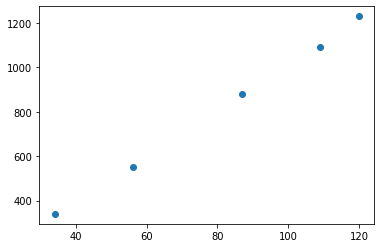

In [78]:
x = np.array([34, 56, 87, 109, 120])
y = np.array([340, 550, 879, 1090, 1230])
plt.scatter(x, y)
plt.show()

In [79]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [80]:
lr.intercept_, lr.coef_

(-17.238154131560464, array([10.28372111]))

In [81]:
ycap = -17.238154131560464 + 10.28372111*x
ycap

array([ 332.40836361,  558.65022803,  877.44558244, 1103.68744686,
       1216.80837907])

In [82]:
y

array([ 340,  550,  879, 1090, 1230])

In [83]:
np.sum((y - ycap)**2)

496.2406663059479